✅ Dataset created successfully!
   age   income  loan_amount  loan_term_month  credit_score  employment_years  \
0   59  81037.0      51879.0               36         552.0                 7   
1   49  30864.0      56723.0               48         711.0                 1   
2   35  86299.0      55374.0               48         666.0                 1   
3   63  35526.0      59244.0               24         760.0                 1   
4   28  80268.0      34300.0               12         655.0                 4   

  marital_status           purpose  default  
0        married  home_improvement        1  
1        married         education        1  
2         single  home_improvement        1  
3         single  home_improvement        1  
4         single               car        1  


C:\Users\risha\AppData\Local\Temp\ipykernel_14164\1687610052.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.9765615   1.11788733  0.62324692 ... -0.15404516 -1.28465181
 -1.70862931]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\risha\AppData\Local\Temp\ipykernel_14164\1687610052.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.63061428 -1.25987821  0.63061428 ...  0.63061428 -0.31463196
  0.63061428]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\risha\AppData\Local\Temp\ipykernel_14164\1687610052.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a f


=== Logistic Regression ===
ROC AUC : 0.9326
              precision    recall  f1-score   support

           0       0.63      0.39      0.48        44
           1       0.95      0.98      0.97       556

    accuracy                           0.94       600
   macro avg       0.79      0.68      0.72       600
weighted avg       0.93      0.94      0.93       600

Confusion Matrix:
 [[ 17  27]
 [ 10 546]]

=== Random Forest ===
ROC AUC : 0.8944
              precision    recall  f1-score   support

           0       0.62      0.11      0.19        44
           1       0.93      0.99      0.96       556

    accuracy                           0.93       600
   macro avg       0.78      0.55      0.58       600
weighted avg       0.91      0.93      0.91       600

Confusion Matrix:
 [[  5  39]
 [  3 553]]


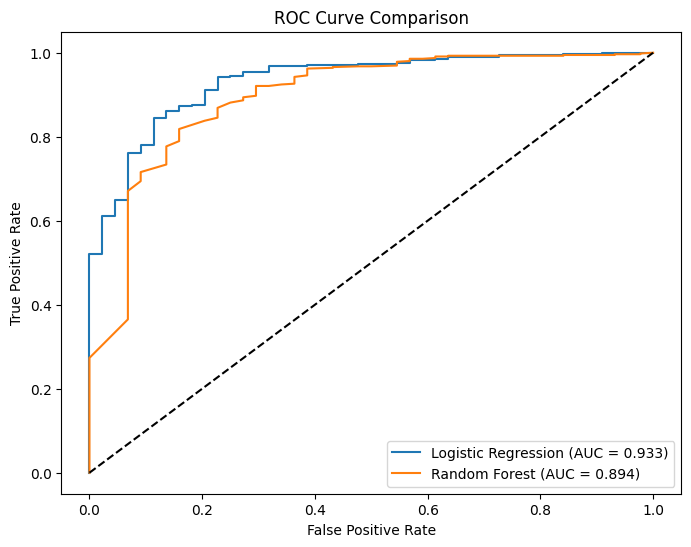

C:\Users\risha\AppData\Local\Temp\ipykernel_14164\1687610052.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette='coolwarm')
C:\Users\risha\AppData\Local\Temp\ipykernel_14164\1687610052.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette='coolwarm')
C:\Users\risha\AppData\Local\Temp\ipykernel_14164\1687610052.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=col, data=df, palette='coolwarm')
C:\Users\risha\AppData\Local\Temp\ipykernel_14164\16876

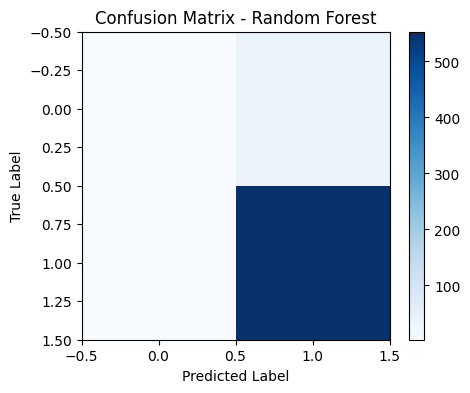

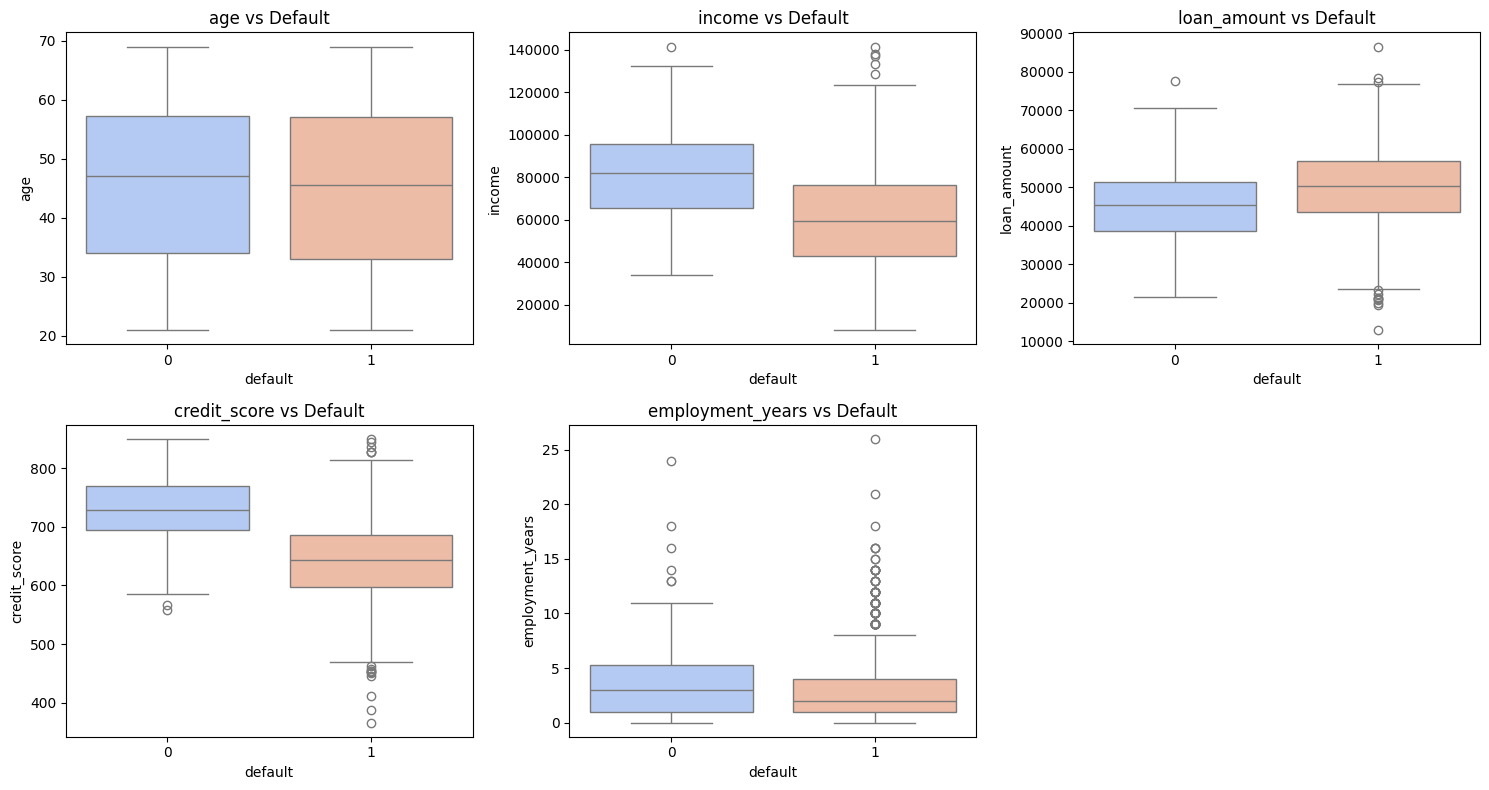

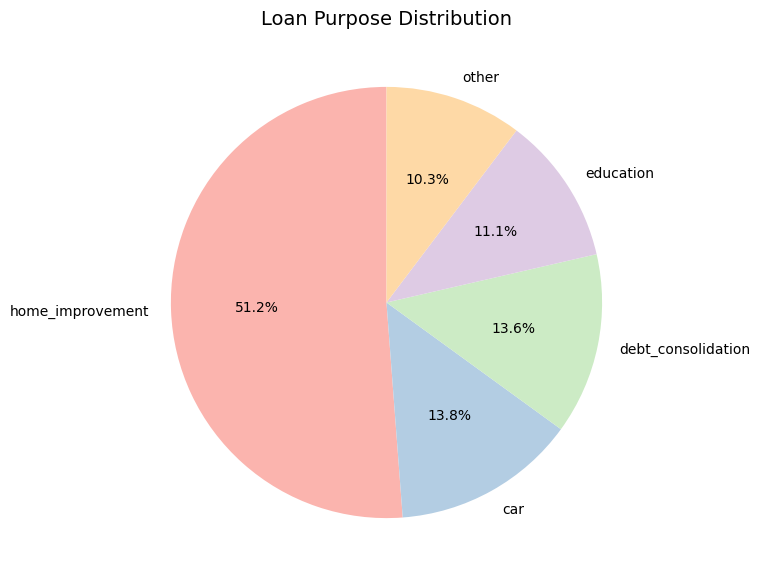

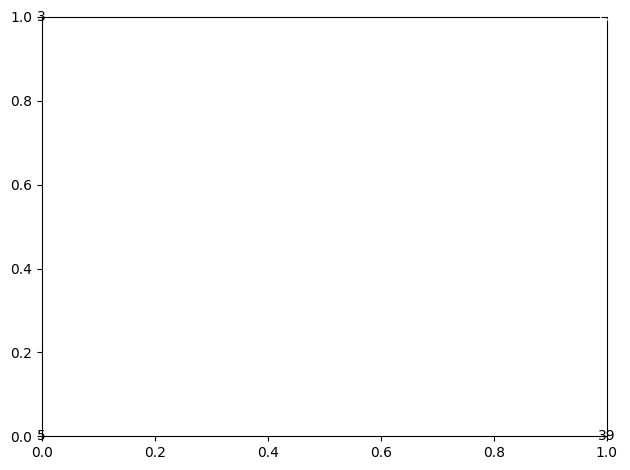

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt



np.random.seed(42)
n = 2000

age = np.random.randint(21, 70, size=n)
gender = np.random.choice(['male', 'female'], size=n)
income = np.round(np.random.normal(60000, 25000, size=n)).clip(8000, 300000)
loan_amount = np.round(np.random.normal(50000, 10000, size=n)).clip(1000, 100000)
loan_term_month = np.random.choice([12, 24, 36, 48, 60], size=n, p=[0.05, 0.15, 0.4, 0.25, 0.15])
credit_score = np.round(np.random.normal(650, 70, size=n)).clip(300, 850)
employment_years = np.round(np.random.exponential(scale=3, size=n)).astype(int)
prior_default = np.random.choice([0, 1], size=n, p=[0.9, 0.1])
marital_status = np.random.choice(['single', 'married', 'divorced', 'widowed'], size=n, p=[0.45, 0.45, 0.07, 0.03])
purpose = np.random.choice(['home_improvement', 'debt_consolidation', 'education', 'car', 'other'], 
                           size=n, p=[0.5, 0.15, 0.1, 0.15, 0.1])

loan_income_ratio = loan_amount / (income + 1)

score = (
    -3.0 * (credit_score - 650) / 100.0
    + 6.0 * loan_income_ratio
    - 0.2 * employment_years
    + 2.5 * prior_default
    + np.where(purpose == 'debt_consolidation', 0.5, 0.0)
    + np.where(marital_status == 'single', 0.1, 0.0)
)

prob_default = 1 / (1 + np.exp(-score))
default = (np.random.rand(n) < prob_default).astype(int)

df = pd.DataFrame({
    'age': age,
    'income': income,
    'loan_amount': loan_amount,
    'loan_term_month': loan_term_month,
    'credit_score': credit_score,
    'employment_years': employment_years,
    'marital_status': marital_status,
    'purpose': purpose,
    'default': default
})

print("✅ Dataset created successfully!")
print(df.head())



X = df.drop(columns=['default'])
y = df['default']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['marital_status', 'purpose'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


num_cols = ['age', 'income', 'loan_amount', 'loan_term_month', 'credit_score', 'employment_years']
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


lr = LogisticRegression(max_iter=1000, solver='liblinear')
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


models = {"Logistic Regression": lr, "Random Forest": rf}
results = {}

for name, model in models.items():
    y_pred_label = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    report = classification_report(y_test, y_pred_label)
    cm = confusion_matrix(y_test, y_pred_label)
    
    results[name] = {"AUC": auc, "Report": report, "CM": cm}
    
    print(f"\n=== {name} ===")
    print(f"ROC AUC : {auc:.4f}")
    print(report)
    print("Confusion Matrix:\n", cm)



plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = results[name]["AUC"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

cm = results["Random Forest"]["CM"]
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

# plt.Figure(figsize=(12,6))
# sns.boxplot(x='default', y='income', data=df, palette='Set2')
# plt.title("Income Distribution by Loan Default",fontsize=14)
# plt.xlabel('default(0 = No,1 = Yes)',fontsize=12)
# plt.ylabel('income',fontsize=12)
# plt.grid(True)
# plt.show()

num_cols = ['age', 'income', 'loan_amount', 'credit_score', 'employment_years']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='default', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Default')
plt.tight_layout()
plt.show()

purpose_counts = df['purpose'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Loan Purpose Distribution', fontsize=14)
plt.show()


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]), ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.tight_layout()
plt.show()